In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pair_approx_ode import *
%matplotlib inline

# Is pair approximation exact?

The purpose of this document was to test by simulation if, when $N$ goes to infinity, pair approximation becomes exact or not. The answer seems to be no. 

In [2]:
!make

g++ -g -O2 -W -Wall twoChoices_openQueue.cc -o simulate


In [3]:
def simulate(N,T,rho=0.7,choice=1,resimulate=False):
    """ choice : 0 (no choice), 1 (=local choice), 2 (JSQ(2), random) """
    fileName = 'tmp/test_N{0}_T{1}_C{2}_r{3}'.format(N,T,int(rho*1000),choice)
    if resimulate or not os.path.isfile(fileName):
        os.system('./simulate N{0} T{1} r{2} C{3} > {4}'.format(N,T,rho,choice,fileName))
    x = np.loadtxt(fileName)
    return(x[:,1]/sum(x[:,1]))

we load the saved result
we load the saved result
we load the saved result


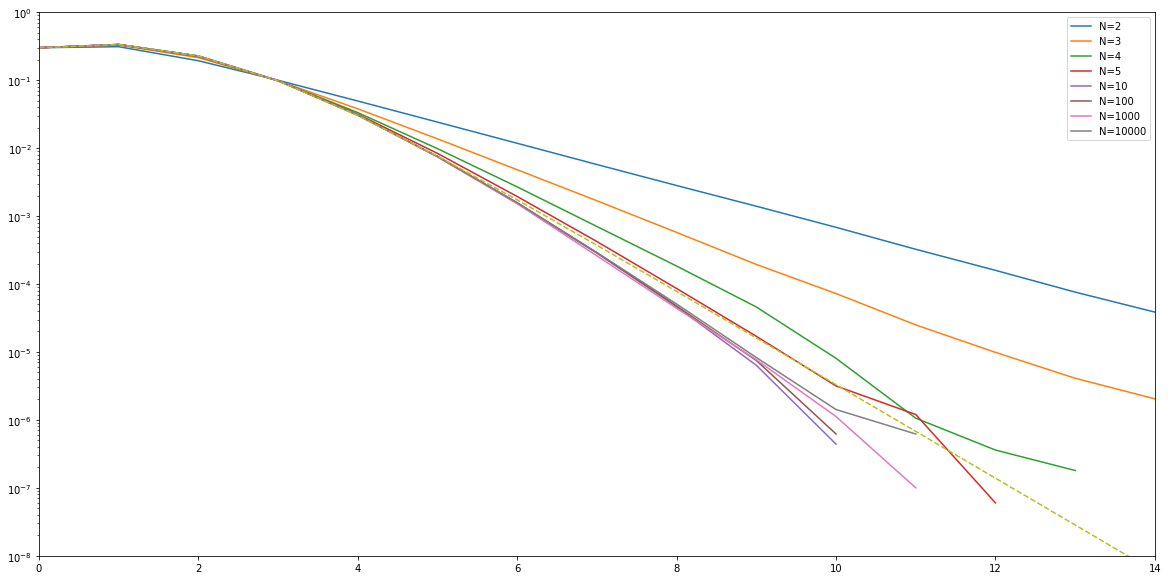

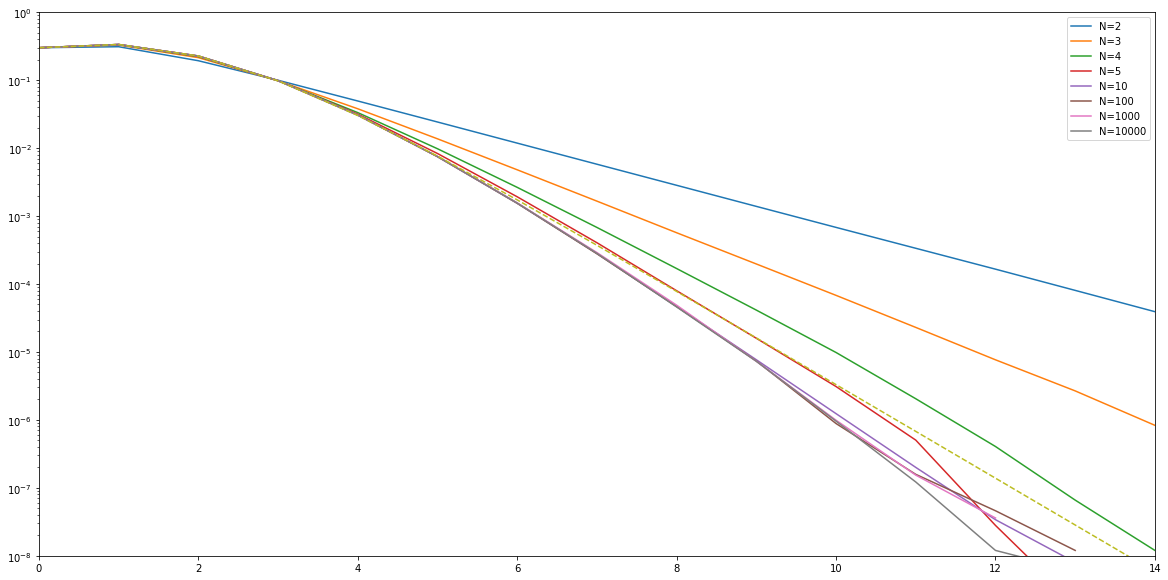

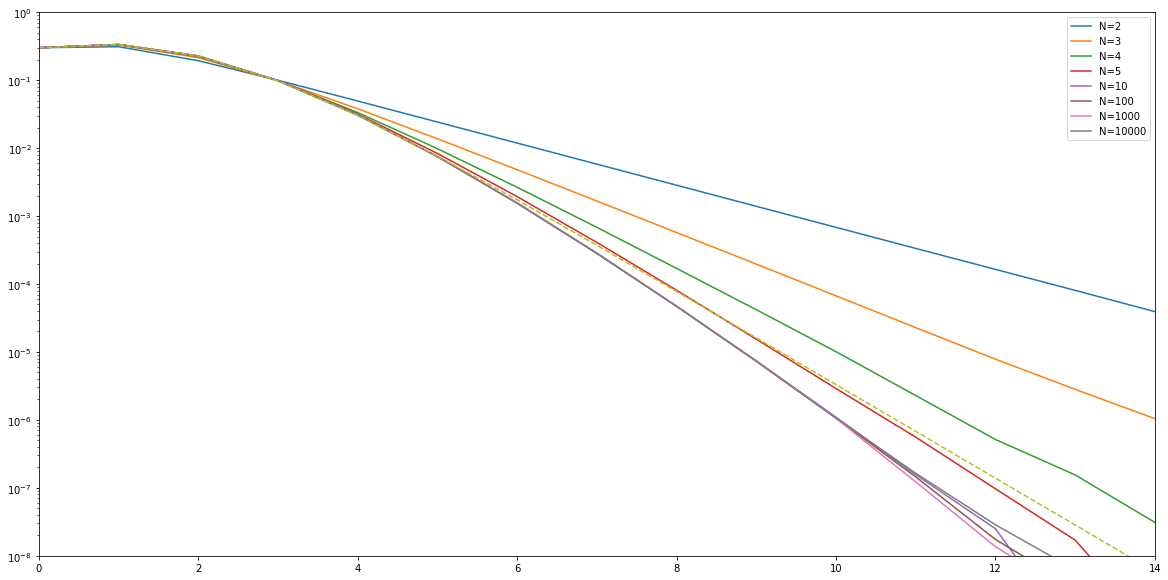

In [15]:
for T in [100000000,1000000000,10000000000]:
    fig = plt.figure()
    fig.set_size_inches(20,10)
    myN = [2,3,4,5,10,100,1000,10000]
    for N in myN:
        nc = simulate(N,T,choice=1)
        plt.semilogy(nc)
    plt.xlim([0,14])
    plt.ylim([1e-8,1])
    plt.legend(['N={}'.format(N) for N in myN])

    y = stationnary_distribution_pairApprox(0.7,100)
    plt.plot(y,'--')

we load the saved result


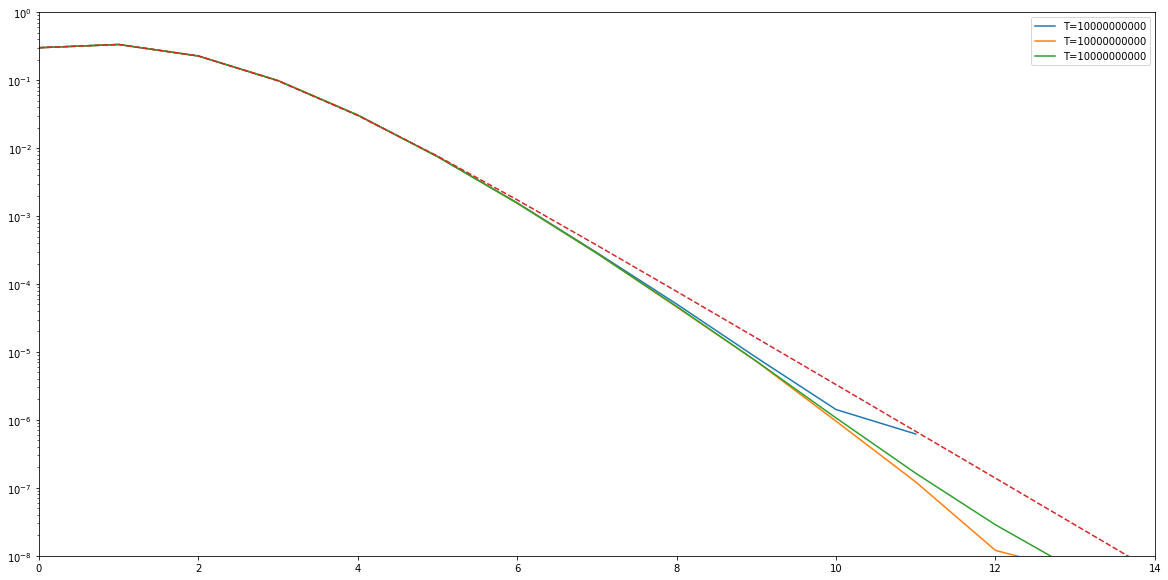

In [17]:
fig = plt.figure()
fig.set_size_inches(20,10)
myT = [100000000,1000000000,10000000000]
myN = [10000]
for N in myN:
    for T in myT:
        nc = simulate(N,T,choice=1)
        plt.semilogy(nc)
plt.xlim([0,14])
plt.ylim([1e-8,1])
plt.legend(['T={}'.format(T) for N in myT])

y = stationnary_distribution_pairApprox(0.7,100)
plt.plot(y,'--')

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


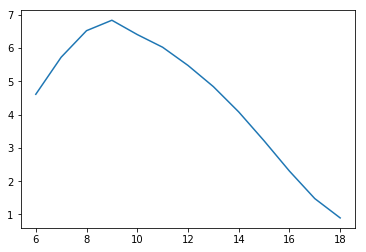

In [32]:
x = nc[::-1]
plt.plot([x[i+1]/x[i] for i in range(len(x)-1)])